In [37]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Read in our csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# Display the DataFrame for preview 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# Check the number of passengers
total_passengers=titanic_df["PassengerId"].nunique()
total_passengers

891

In [40]:
# Calculate the number of passengers who survived and did not survive
# 0 = did not survive
# 1 = survived
survival_counts = titanic_df.Survived.value_counts()
survival_counts

0    549
1    342
Name: Survived, dtype: int64

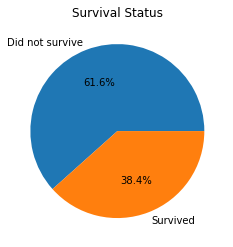

In [65]:
# Let us visualize that calculation as a percentage
labels=['Did not survive', 'Survived']
survival_counts.plot(kind='pie', labels=labels, autopct="%1.1f%%")
plt.title('Survival Status')
plt.ylabel('')
plt.savefig('Images/Image_1.PNG', facecolor='white')
plt.show()

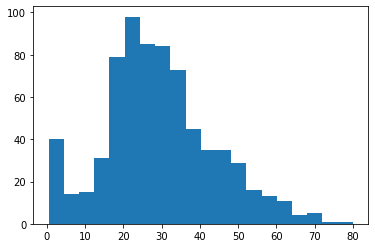

In [66]:
# Let us visualize the age distribution amongst the 891 passengers
plt.hist(titanic_df.Age, bins=20)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.savefig('Images/Image_2.PNG', facecolor='white')
plt.show()

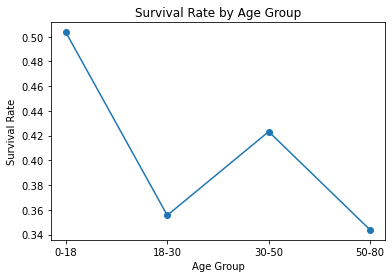

In [67]:
# Let's calculate survival rate for each age group
# define age groups
age_bins = [0, 18, 30, 50, 80]

# define labels for age groups
age_labels = ['0-18', '18-30', '30-50', '50-80']

# add age group column
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)

# calculate survival rate for each age group
age_survival_rate = titanic_df.groupby('AgeGroup')['Survived'].mean()

# Create a line chart to show the trend of survival rate over age groups
plt.plot(age_labels, age_survival_rate, marker='o')

# Add title and labels to the chart
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

plt.savefig('Images/Image_3.PNG', facecolor='white')

# Show the chart
plt.show()

In [68]:
age_survival_rate

AgeGroup
0-18     0.503597
18-30    0.355556
30-50    0.423237
50-80    0.343750
Name: Survived, dtype: float64

In [69]:
# Calculate the gender ratio amongst the 891 passengers
gender_counts = titanic_df.Sex.value_counts()
gender_counts

male      577
female    314
Name: Sex, dtype: int64

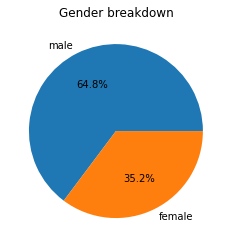

In [70]:
# Let us visualize that calculation as a percentage using a pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%")

# Add title and labels to the chart
plt.title('Gender breakdown')
plt.ylabel('')

plt.savefig('Images/Image_4.PNG', facecolor='white')

plt.show()

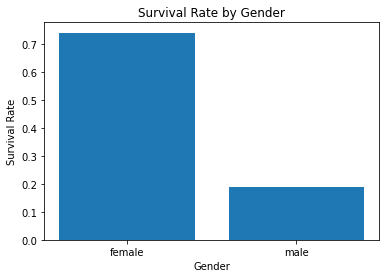

In [71]:
# Let's calculate the survival rate by gender
gender_survival_rate = titanic_df.groupby('Sex')['Survived'].mean()

# Create a bar chart to show the trend of survival rate over age groups
plt.bar(gender_survival_rate.index.values, gender_survival_rate)

# Add title and labels to the chart
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

plt.savefig('Images/Image_5.PNG', facecolor='white')

# Show the chart
plt.show()

In [72]:
gender_survival_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [73]:
# Calculate the count for each class amongst the 891 passengers
class_counts = titanic_df.Pclass.value_counts()
class_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

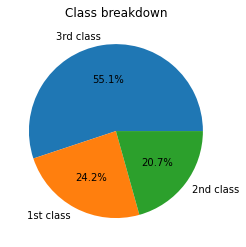

In [74]:
# Create a dictionary to map the original labels to new labels
class_labels = {3: '3rd class', 2: '2nd class', 1: '1st class'}

# Replace the labels using the map() method
class_counts.index = class_counts.index.map(class_labels)

# Create the pie chart with the new labels
class_counts.plot(kind="pie", autopct="%1.1f%%", labels=class_counts.index)
plt.title('Class breakdown')
plt.ylabel('')

plt.savefig('Images/Image_6.PNG', facecolor='white')

plt.show()

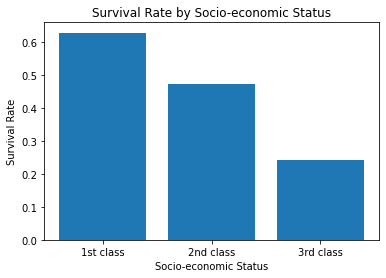

In [75]:
# Let's calculate the survival rate by class
class_survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()

# Create a bar chart to show the trend of survival rate by class
plt.bar(class_survival_rate.index.values, class_survival_rate)

# Add title and labels to the chart
plt.title('Survival Rate by Socio-economic Status')
plt.xlabel('Socio-economic Status')
plt.ylabel('Survival Rate')

# Set the tick labels to display class labels
plt.xticks(class_survival_rate.index.values, ['1st class', '2nd class', '3rd class'])

plt.savefig('Images/Image_7.PNG', facecolor='white')

# Show the chart
plt.show()

In [76]:
class_survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

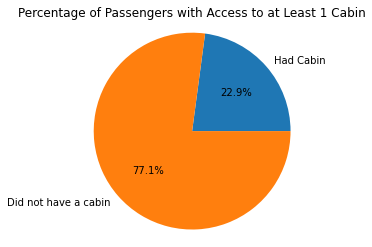

In [77]:
# Calculate the number of passengers who had access to at least 1 cabin
Cabin_counts = titanic_df.Cabin.count()
Cabin_percentage = Cabin_counts/total_passengers*100
Cabin_percentage = {"Had Cabin": 22.895622895622896,
                   "Did not have a cabin": 100-22.895622895622896}
labels = ['Had Cabin', 'Did not have a cabin']
sizes = [Cabin_percentage['Had Cabin'], Cabin_percentage['Did not have a cabin']]
colors = ['lightblue', 'lightgrey']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Passengers with Access to at Least 1 Cabin')

plt.savefig('Images/Image_8.PNG', facecolor='white')

plt.show()

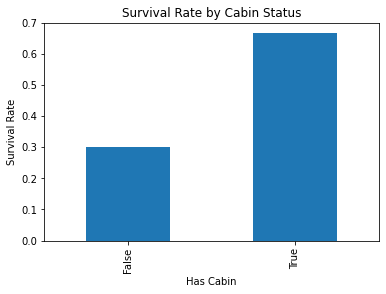

In [78]:
# Let us determine if those who had access to a cabin had a higher survival rate
# Create a new column called 'HasCabin'
titanic_df['HasCabin'] = titanic_df['Cabin'].notna()

# Group the data by the 'HasCabin' column and calculate the survival rate for each group
survival_by_cabin = titanic_df.groupby('HasCabin')['Survived'].mean()

# Visualize the survival rate by cabin status
survival_by_cabin.plot(kind='bar')
plt.title('Survival Rate by Cabin Status')
plt.xlabel('Has Cabin')
plt.ylabel('Survival Rate')

plt.savefig('Images/Image_9.PNG', facecolor='white')

plt.show()

In [79]:
survival_by_cabin

HasCabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64

In [80]:
# Let us breakdown cabin occupancy by socio-economic-status
# Filter the dataset to include only passengers who had cabins
cabin_df = titanic_df[titanic_df['Cabin'].notna()]

# Calculate the number of passengers in each class who had cabins
cabin_class_counts = cabin_df.Pclass.value_counts()
cabin_class_counts

1    176
2     16
3     12
Name: Pclass, dtype: int64

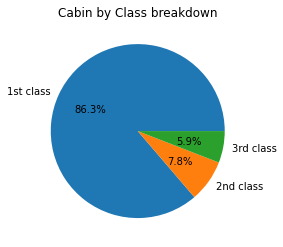

In [81]:
# Let us visualize that calculation as a percentage
labels = ['1st class', '2nd class', '3rd class']
plt.pie(cabin_class_counts.values, labels=labels, autopct="%1.1f%%")
plt.title('Cabin by Class breakdown')

plt.savefig('Images/Image_10.PNG', facecolor='white')

plt.show()

In [82]:
# Let us breakdown the passengers by which port they embarked from
Embarked_counts = titanic_df.Embarked.value_counts()
Embarked_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

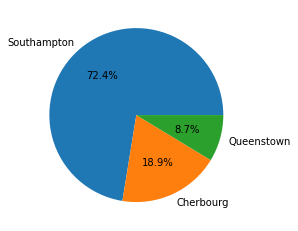

In [83]:
# Let us visualize that calculation as a percentage
labels = ['Southampton', 'Cherbourg', 'Queenstown']
plt.pie(Embarked_counts.values, labels=labels, autopct="%1.1f%%")

plt.savefig('Images/Image_11.PNG', facecolor='white')

plt.show()

In [84]:
# Let us breakdown the survival rate by which port the passenger embarked from
Embarked_survival_rate = titanic_df.groupby('Embarked')['Survived'].mean()
Embarked_survival_rate

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

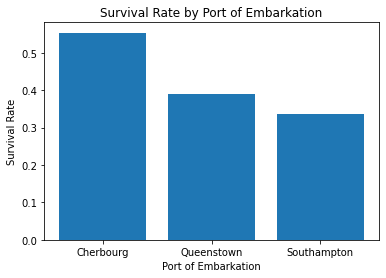

In [85]:
# Create a bar chart to show the trend of survival rate by port of embarkation
plt.bar(Embarked_survival_rate.index.values, Embarked_survival_rate)

# Add title and labels to the chart
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

# Set the tick labels to display Embarked labels
plt.xticks(Embarked_survival_rate.index.values, ['Cherbourg', 'Queenstown', 'Southampton'])

plt.savefig('Images/Image_12.PNG', facecolor='white')

# Show the chart
plt.show()